In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt



In [14]:
df = pd.read_csv('Prostate.csv')

print(df.head())

   id diagnosis  radius  texture  perimeter  area  smoothness  compactness  \
0   1         M      23       12        151   954       0.143        0.278   
1   2         B       9       13        133  1326       0.143        0.079   
2   3         M      21       27        130  1203       0.125        0.160   
3   4         M      14       16         78   386       0.070        0.284   
4   5         M       9       19        135  1297       0.141        0.133   

   symmetry  fractal_dimension  
0     0.242              0.079  
1     0.181              0.057  
2     0.207              0.060  
3     0.260              0.097  
4     0.181              0.059  


accuracy :  0.8
[[ 1  3]
 [ 1 15]]


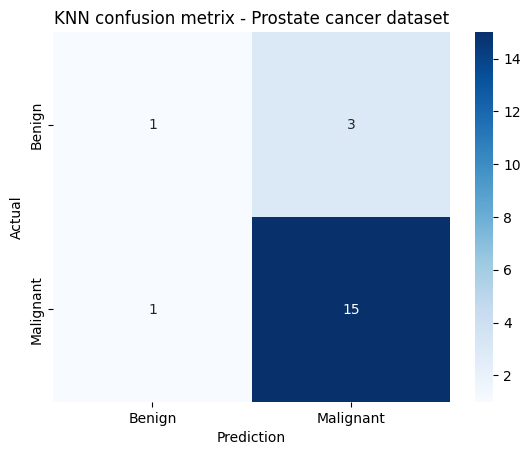

In [19]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("accuracy : ",  accuracy)


cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('KNN confusion metrix - Prostate cancer dataset')
plt.show()